# Criação da tabela (Pandas DataFrame) com os dados da partitura

## Conversão de dados midi em uma tabela

Um patch no programa *OpenMusic* (__http://repmus.ircam.fr/openmusic/home__) permitiu a extração dos primeiros dados do arquivo mid gerado no *Lilypond*, relacionados a alturas, onsets (tempo de início dos eventos) e durações dos eventos.

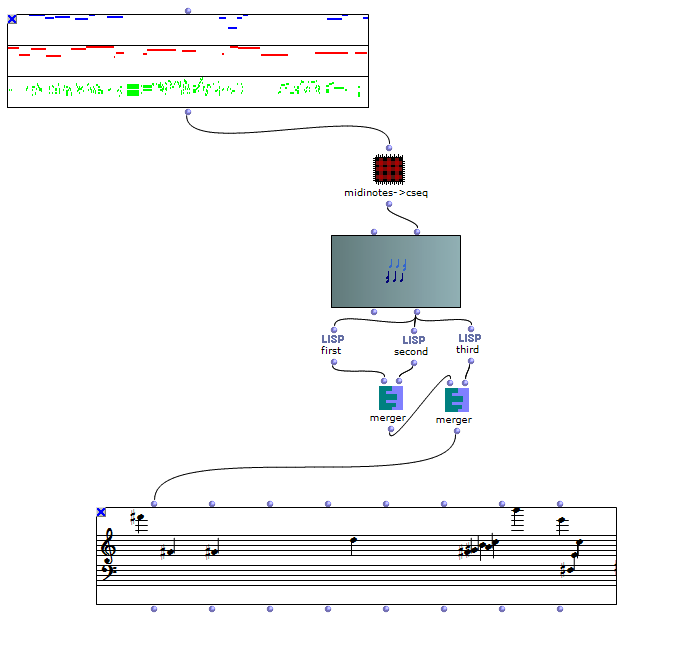

A caixa na parte inferior da figura acima (objeto *Chordseq*) apresenta diversas saídas (círculos azuis na parte inferior) de onde podem ser extraídas as informações de alturas (lista de números midi associados às notas da partitura), onsets e durações (em milisegundos). Esses dados precisaram ser convertidos de *Lisp* (linguagem utilizada pelo software *OpenMusic*, ou *OM*) para *Python*.

## Códigos Python

In [2]:
import ast

### take data from OM chord-seq and translate into Python lists

OM_pitches = "((9000) (6600) (6600) (7400) (6600) (6800) (7100) (6900) (7200) (9500) (8800) (5400) (6400) (7200) (5600) (5800) (6800) (7900) (7600) (7400) (7100) (6900) (6500) (6800) (6600) (6300) (6500) (6800) (8800) (7100) (7100 6800 5900) (5800) (7400) (7100) (9000) (6700 6600 5700) (7800) (7700) (6700 6600 6200) (5900) (6100) (6600) (7400 7300) (9100) (7100 6300 5700 5400) (6600) (6900) (6700) (6600) (8800) (5800 5300) (8500) (7800) (7700) (6200) (6300) (7300) (6800) (6600) (6700) (5800) (6800) (7100) (6700) (6700) (6900) (7100) (6300) (9200) (7600) (6500) (7900) (9500) (6900) (6800) (6500) (6000) (7300 6200 6000) (6700) (6200 5900) (7600) (7200 6600 5900) (6500) (6300 6200 5700) (9000) (6600) (6500) (6700) (6900) (7900) (6200) (6600) (5200) (7100) (6300) (7200) (5700) (7600 7100 6900 6200 5800 5400) (5800) (7400) (7500 7100 6400) (7600) (8500) (8000) (7900) (7600) (7900) (7600 7300 7100) (8100 7300 6600) (7100 6500) (7600 6700 6200) (7200 6800) (5600) (6700) (8200) (6600) (6900) (8000) (8600) (8500) (7000) (7700) (8400) (7900) (7200) (8000) (8300) (10000) (8300) (8200) (7900) (8100) (7800) (7100) (7300) (7400) (7500) (7900) (7800) (8400) (6200 5800 5500) (8300) (7600 7100 5700) (6600) (8700) (8800) (8500) (8400) (8200) (6700) (7300) (8300) (8400) (8100) (6700) (5800) (5700) (7300) (7700) (6800) (6700) (5900) (7400 6400 6100) (6700) (6800) (7000) (6900) (6200) (7100) (7700) (8200) (7500) (8400) (9000) (8900) (9200) (9100) (8200) (7300) (6900) (6500) (7300) (7100) (5400) (5600) (6200) (5400) (6500) (5900) (7100) (6200) (7600) (7600) (7600) (7600) (7300) (7900) (6300) (6200) (6600) (8400) (8800) (7100 6900 6200 5800 5400) (7600) (6600) (6500) (6700) (6800) (6600) (6800) (7100) (6400) (9300) (6800) (5800) (6200) (6200) (6200) (6200) (7900) (8800) (9000) (5700) (7800) (7300) (6200) (9500) (7400) (5800) (6100) (6900) (7700) (7000) (8000) (5700) (7200) (6600) (7300 6900 6200 5900) (7800) (8600) (8300) (6500) (6000) (6900) (6200) (7200) (7300) (8400) (6900) (6300) (8400) (6900) (8000) (8500 7500 7100 6200) (7400 6800 6300) (7100 6800 6700 5700) (7400 6400 6100) (8600) (7900) (8000) (8200) (6900) (9500) (6600) (6500) (7900) (7100 5100 5900 5600) (8800))"

OM_onsets = "(0 616 1548 4432 6818 6960 7111 7250 7400 7841 8764 8954 9057 9153 10085 10318 10554 10909 11088 11270 11449 11591 11724 11861 11997 12216 12321 12435 13812 14261 15270 16364 16463 16569 17486 17634 18480 18623 18765 18907 19034 20526 20819 21137 21435 22236 22435 22842 23040 23182 23387 24887 25043 25177 25313 25447 25574 25711 25847 25981 26114 26251 26362 26720 26866 27004 27293 27675 28751 29109 29307 29609 29914 30175 30359 30532 30713 31251 31616 31987 32362 33126 33751 34029 36546 36807 37171 37546 38942 39584 39844 40365 40886 41032 41181 41327 41469 43508 48751 48901 49351 49551 50919 52751 52951 53151 54168 54793 55731 56043 56456 56876 57293 57431 57569 57706 57843 57981 58539 58751 59163 59289 59413 59789 60038 60788 61138 61351 61926 62018 62118 62213 62306 62501 62581 62663 62751 62831 62913 63076 63269 63656 63851 64039 64393 64481 64563 64643 64726 64806 64906 65006 65106 65206 65388 65513 65643 65768 65901 66026 66156 66281 67693 68851 68913 68981 69251 69376 69493 69618 69863 69976 70089 70201 70469 70876 70976 71076 71176 71276 71381 71481 71581 72001 72113 72226 72338 72451 72563 72676 72788 72901 73101 73301 73506 73706 74926 75531 76138 76406 76676 76951 77093 78221 78249 78335 78420 78505 79982 80133 80275 80465 81190 81283 81610 81724 81951 82179 82477 83599 83832 84173 84991 85196 85403 85608 85943 92258 98542 98826 99403 99665 101008 101625 102861 104480 104693 105304 106591 106852 107108 108137 108477 108656 108802 108951 109100 109541 109698 109993 110437 111868 112180 112225 112937 113656 115948 116295 116989 117406 118239 119073 121896 122962 123240 126625 127649 129663 131666)"

OM_durations = "((4432) (307) (304) (3940) (142) (142) (139) (145) (142) (5971) (5497) (94) (91) (932) (227) (230) (227) (179) (176) (179) (133) (133) (137) (136) (105) (105) (108) (108) (3220) (5603) (361 361 361) (99) (100) (99) (3645) (846 846 846) (134) (133) (133 133 133) (119) (120) (284) (312 312) (1818) (796 796 796 796) (199) (199) (198) (199) (5569) (151 151) (4697) (128) (128) (128) (127) (128) (128) (125) (128) (128) (111) (115) (139) (138) (282) (139) (468) (10191) (198) (302) (201) (2337) (173) (173) (170) (173) (365 365 365) (364) (365 365) (556) (625 625 625) (139) (555 555 555) (5944) (364) (365) (361) (424) (2917) (261) (261) (139) (139) (139) (142) (139) (4357 4357 4357 4357 4357 4357) (150) (150) (3200 3200 3200) (1368) (10712) (200) (200) (200) (308) (933 933 933) (308 308 308) (413 413) (413 413 413) (205 205) (138) (138) (137) (137) (138) (137) (204) (205) (118) (117) (118) (242) (743) (243) (100) (1918) (92) (95) (95) (93) (95) (80) (82) (80) (80) (82) (80) (187) (187 187 187) (4945) (188 188 188) (187) (83) (82) (80) (83) (80) (95) (95) (95) (95) (95) (125) (126) (125) (125) (125) (125) (125) (125) (1150 1150 1150) (62) (63) (62) (117) (117) (120) (120) (113) (113) (112) (268) (269) (100) (100) (100) (100) (100) (100) (100) (100) (112) (113) (112) (113) (112) (113) (112) (113) (200) (200) (200) (200) (200) (200) (200) (268) (270) (267) (2634) (142 142 142 142 142) (562) (86) (85) (85) (85) (142) (142) (142) (3367) (2983) (319) (108) (227) (228) (298) (298) (341) (1847) (8085) (199) (198) (199) (198) (1846) (9651) (284) (577) (253) (1343) (608) (1079) (1619) (213) (605) (776 776 776 776) (253) (256) (1029) (173) (171) (146) (149) (149) (146) (146) (145) (295) (1424) (173) (11980) (355 355 355 355) (354 354 354) (354 354 354 354) (1041 1041 1041) (5601) (417) (833) (834) (3698) (2253) (278) (277) (4295) (684 684 684 684) (2003))"

def om_lst(str_data):
    # trocar () por []; " " por ", "
    chars1 = ["(", ")", " "]
    chars2 = ["[", "]", ", "]
    s = str_data
    for i,j in zip(chars1, chars2):
        s = s.replace(i, j)
    return s


midicents = om_lst(OM_pitches)
midicents_lst = ast.literal_eval(midicents)
temp_lst = []
for i in midicents_lst:
    temp = []
    for j in i:
        n = int(j/100)
        temp.append(n)
    temp_lst.append(temp)
pitches_lst = temp_lst  # midi normal, sem midicents

onsets = om_lst(OM_onsets)
onsets_lst = ast.literal_eval(onsets)
onsets_lst = onsets_lst[:-1]    # suprimir o último valor que se refere à duração total

durations = om_lst(OM_durations)
durations_lst = ast.literal_eval(durations)
durations_lst = [i[0] for i in durations_lst] # considerar idênticas as durações das notas do mesmo acorde


Em seguida, esses dados foram inseridos em um pandas DataFrame.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dict = {'pitches': pitches_lst, 'onsets': onsets_lst, 'durations': durations_lst}

df = pd.DataFrame(dict)

In [4]:
df.head()

,pitches,onsets,durations
0,[90],0,4432
1,[66],616,307
2,[66],1548,304
3,[74],4432,3940
4,[66],6818,142


Como pode ser observado no início da tabela acima, as informações de alturas se econtram na coluna *pitches*. Cada evento extraído do objeto *Chordseq* é considerado um acorde - mesmo se são sons isolados -, por isso os colchetes. No caso de acordes com mais notas, essa forma de representar os dados fica interessante, porque para um grupo de notas temos apenas um valor de onset e duration. Por exemplo, a linha 30 da tabela tem os seguintes valores:

In [5]:
df.loc[30]

pitches      [71, 68, 59]
onsets              15270
durations             361
Name: 30, dtype: object

## Completando a tabela com mais informações

Há diversas informações que adicionamos à tabela (novas colunas) para permitir a elaboração de algoritmos de segmentação automática e avaliação de similaridade/contraste entre os segmentos. Na sequência apresentamos os códigos que permitiram ampliar a tabela.

A primeira coluna acrescentada indicava os nomes da notas e oitava (considerando a oitava central como 4), uma vez que isso facilitava a localização/identificação dos eventos.

In [7]:
def mid_name(mid_number, central_octave=4):
    'converte nota midi ou lista de notas midi em nomes. Ex: 66 => f#4 // arguments => numbers or list of numbers'
    if type(mid_number) == int:
        pc = mid_number % 12
        x = 5 - central_octave
        oct = (mid_number // 12) - x
        dict = {0:'c', 1:'c#', 2:'d', 3:'ef', 4:'e', 5:'f', 6:'f#', 7:'g', 8:'g#', 9:'a', 10:'bf', 11:'b'}
        name = dict[pc] + str(oct)
        return name
    elif type(mid_number) == list:
        names = []
        for i in mid_number:
            pc = i % 12
            x = 5 - central_octave
            oct = (i // 12) - x
            dict = {0:'c', 1:'c#', 2:'d', 3:'ef', 4:'e', 5:'f', 6:'f#', 7:'g', 8:'g#', 9:'a', 10:'bf', 11:'b'}
            name = dict[pc] + str(oct)
            names.append(name)
        return names

In [8]:
# criar coluna com nomes de notas
df['notes'] = df.pitches.apply(mid_name)
df.head()

,pitches,onsets,durations,notes
0,[90],0,4432,[f#6]
1,[66],616,307,[f#4]
2,[66],1548,304,[f#4]
3,[74],4432,3940,[d5]
4,[66],6818,142,[f#4]


A próxima coluna acrescentada indica a que pauta da partitura o evento está associado.

In [9]:
## column with staff id ['up', 'center', 'down'] 
staff1_idx = [9,28,34,43,51,72,84,127,201,211,220,226,257,262,267]
staff2_idx = [0,3,10,29,49,68,88,89,101,102,141,203,212,221,227,252,265]

df['staff_id'] = ['down']*268
df.loc[staff1_idx, 'staff_id'] = 'up'
df.loc[staff2_idx, 'staff_id'] = 'center'

df.head()

,pitches,onsets,durations,notes,staff_id
0,[90],0,4432,[f#6],center
1,[66],616,307,[f#4],down
2,[66],1548,304,[f#4],down
3,[74],4432,3940,[d5],center
4,[66],6818,142,[f#4],down


Na sequência, acrescentar uma coluna com a corda do violão usada em cada nota. Isso é importante, porque a afinação microtonal das cordas implica em sons diferentes para a mesma nota em cordas diferentes. Embora muitas vezes a partitura indique a corda destinada, há algumas passagens onde isso fica sob responsabilidade do intérprete. Assim, essa escolha implica em uma camada a mais no processo de diferenciação do material harmônico. Sobre esse ponto, acreditamos que a maior parte das definições de Ferneyhough apoiou-se em um material temperado, mas prevendo um processo de diferenciação microtonal posterior não completamente controlado/fixo.

In [10]:
## cordas por sistema (todas as pautas)
string_number = [[4], [5], [5], [4], [5], [5], [2], [3], [3], [1], [5], [6], [4], [3], [6], [5], [3], 
[3], [3], [3], [4], [4], [4], [4], [4], [4], [4], [3], [1], [6], [2,3,5], [5], [2], [2], [2], [3,4,5], [1], [1], [3,4,5], [5], [5], [5], [3,4],
[3], [2,4,5,6], [5], [5], [6], [5], [1], [5,6], [5], [2], [2], [4], [4], [2], [3], [4], [4], [6], [4], [2], [6], [3], [3], [2], [6], [1], [2], [4], [2], [2], [3], [3], [4], [6], 
[3,4,6], [4], [4,6], [3], [4,5,6], [5], [6,4,5], [2], [5], [5], [4], [5], [3], [5], [5], [6], [2], [4], [2], [5], [1,2,3,4,5,6], 
[5], [2], [3,4,5], [6], [5], [1], [1], [2], [3], [1,3,2], [1,3,4], [2,3,4], [2,3,4], [2,3], [6], [3], [1], [4], [3], [1], [1], [1], [4], [3], [1], [2], [3], [2], [3], 
[1], [2], [2], [3], [2], [3], [2], [3], [3], [3], [2], [2], [1], [4,5,6], [6], [1,2,5], [5], [1], [1], [1], [1], [2], [3], [3], [1], [1], [1], [3], [5], [5], [2], [1], [3], [3], [5], [2,4,5],
[3], [4], [4], [4], [5], [3], [2], [2], [3], [2], [1], [1], [1], [1], [2], [4], [5], [6], [4], [4], [6], [6], [4], [6], [4], [5], [2], [4], [2], [1], [2], [1], [3], [3], [6], [5], [5], [2],
[1], [2,3,4,5,6], [6], [5], [5], [3], [3], [5], [5], [4], [6], [4], [3], [5], [5], [5], [5], [5], [3], [1], [4], [5], [2], [3], [5], [1],
[4], [5], [5], [3], [1], [3], [1], [5], [3], [4], [2,3,4,5], [2], [1], [1], [5], [5],
[4], [5], [3], [3], [2], [5], [6], [1], [4], [6], [1,3,2,4], [2,3,4], [2,4,3,5],
[2,4,5], [3], [1], [1], [1], [4], [1], [5], [5],
[3], [2,4,5,6], [1]] 

df['string'] = string_number
df.head()

,pitches,onsets,durations,notes,staff_id,string
0,[90],0,4432,[f#6],center,[4]
1,[66],616,307,[f#4],down,[5]
2,[66],1548,304,[f#4],down,[5]
3,[74],4432,3940,[d5],center,[4]
4,[66],6818,142,[f#4],down,[5]


Para o processo de segmentação automática torna-se necessário uma coluna com distâncias temporais entre ataques da pauta inferior (staff_id = down). Isso pode ser obtido subtraindo-se os onsets de eventos sucessivos da pauta inferior. Para os eventos das outras pautas acrescentamos o valor 0, apenas para completar a coluna (esses dados não serão usados). Acrescenta-se 0 também para o primeiro evento da pauta inferior, uma vez que não há distância de nada anterior.

In [11]:
## separar pauta 3
st3 = df.loc[df.staff_id=='down']
st3.head()

,pitches,onsets,durations,notes,staff_id,string
1,[66],616,307,[f#4],down,[5]
2,[66],1548,304,[f#4],down,[5]
4,[66],6818,142,[f#4],down,[5]
5,[68],6960,142,[g#4],down,[5]
6,[71],7111,139,[b4],down,[2]


In [12]:
## calcular dist_atk para st3 apenas e criar nova coluna (0 para demais valores)
onsets = st3.onsets
st3_dist_atk_array = onsets[1:].array - onsets[:-1].array
st3_dist = np.concatenate([np.array([0]), st3_dist_atk_array])

df['st3_dist_atk'] = [0]*268
df.iloc[st3.index, -1] = st3_dist

df.head()

,pitches,onsets,durations,notes,staff_id,string,st3_dist_atk
0,[90],0,4432,[f#6],center,[4],0
1,[66],616,307,[f#4],down,[5],0
2,[66],1548,304,[f#4],down,[5],932
3,[74],4432,3940,[d5],center,[4],0
4,[66],6818,142,[f#4],down,[5],5270


Ainda para o processo de segmentação automática torna-se necessário uma coluna com as pausas entre os eventos da pauta inferior. As pausas podem ser obtidas pela diferença entre as distância entre ataques e as durações dos eventos da pauta inferior (as distâncias entre ataques incluem as durações dos eventos e as pausas separadoras).

In [13]:
filt = (df['staff_id'] == 'down')
pos = df[filt].index.array

dx = df.iloc[pos[1:]]['st3_dist_atk'].array - df.iloc[pos[:-1]]['durations'].array

df['st3_rests'] = pd.Series([0]*268)
df.loc[pos[:-1],'st3_rests'] = dx

df.head()

,pitches,onsets,durations,notes,staff_id,string,st3_dist_atk,st3_rests
0,[90],0,4432,[f#6],center,[4],0,0
1,[66],616,307,[f#4],down,[5],0,625
2,[66],1548,304,[f#4],down,[5],932,4966
3,[74],4432,3940,[d5],center,[4],0,0
4,[66],6818,142,[f#4],down,[5],5270,0


Como passo final, salva-se o DataFrame como arquivo no formato .csv

In [14]:
df.to_csv('mov1_data.csv', index=False)